In [3]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt


In [4]:
housing = fetch_california_housing()

In [10]:

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)


X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


In [15]:
model =keras.models.Sequential([
keras.layers.Dense(30, activation='relu', 
input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

In [16]:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [17]:
history =model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
                                                                 

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3324 - mean_absolute_percentage_error: 44.4637 - root_mean_squared_error: 1.1186 - val_loss: 0.5137 - val_mean_absolute_percentage_error: 29.5087 - val_root_mean_squared_error: 0.7167
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5670 - mean_absolute_percentage_error: 30.3103 - root_mean_squared_error: 0.7528 - val_loss: 0.4742 - val_mean_absolute_percentage_error: 31.2721 - val_root_mean_squared_error: 0.6886
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5079 - mean_absolute_percentage_error: 28.5032 - root_mean_squared_error: 0.7124 - val_loss: 0.4399 - val_mean_absolute_percentage_error: 28.6481 - val_root_mean_squared_error: 0.6632
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4641 - mean_absolute_percentage_error: 27.8670 - root_mean_squared_error: 0.6812 - val_loss: 0.4316 - val_mean_absolute_percentage_error: 28.5495 - val_root_mean_squared_error: 0.6569
Epoch 5/10
363/3

<Axes: >

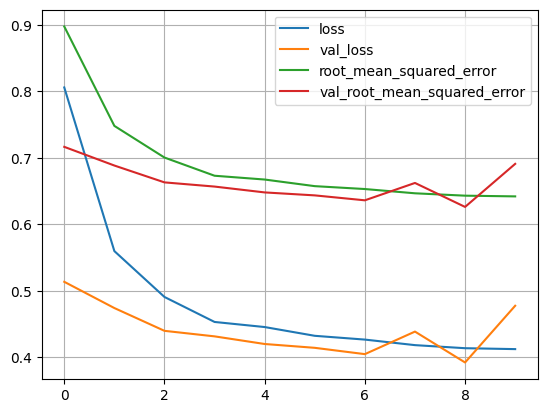

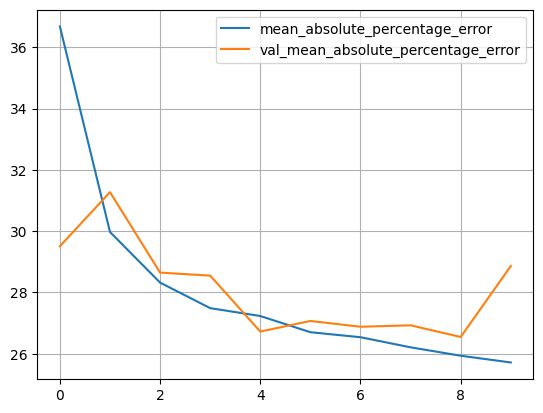

In [18]:
dfHistory = pd.DataFrame (history.history)
dfHistory [['loss', 'val_loss', 'root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(grid=True)


In [19]:

##Evaluar conjunto de entrenamiento
loss, RMSE, MAPE =model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

##Evaluar validacion
loss, RMSE, MAPE =model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid:", loss)
print("root_mean_squared_error valid:", RMSE)
print("mean_absolute_percentage_error valid:", MAPE)

##Evaluar conjunto de prueba
loss, RMSE, MAPE =model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)



363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.4435 - mean_absolute_percentage_error: 27.3397 - root_mean_squared_error: 0.6657
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.49458280205726624
root_mean_squared_error train: 0.7032657861709595
mean_absolute_percentage_error train: 27.7528018951416
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.5066 - mean_absolute_percentage_error: 28.2251 - root_mean_squared_error: 0.7111
Evaluar el modelo en el conjunto de validación
loss valid: 0.477622389793396
root_mean_squared_error valid: 0.6911023259162903
mean_absolute_percentage_error valid: 28.863100051879883
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.5312 - mean_absolute_percentage_error: 28.1361 - root_mean_squared_error: 0.7266
Evaluar el modelo en el conjunto de prueba
loss test: 0.6160173416137695
root_mean_squared_error test: 0.7848677039146423
mean_absolute_percentage_error test: 28.705726623535156
